In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
# Ensure you have the Vader lexicon downloaded
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\tiago\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tiago\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

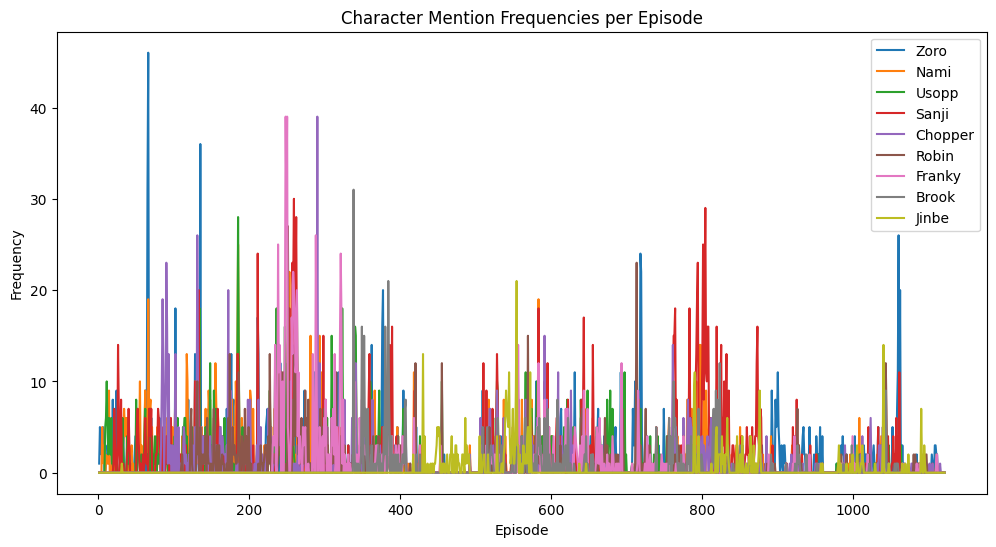

In [2]:
df = pd.read_csv('data2.csv')
              
words_to_check = ['Zoro', 'Nami', 'Usopp', 'Sanji', 'Chopper', 'Robin', 'Franky', 'Brook', 'Jinbe' ]
#words_to_check = ['Kid']

# Initialize a dictionary to store word frequencies
word_frequencies = {word: [] for word in words_to_check}
word_frequencies['Episode'] = []

# Calculate word frequencies for each episode
for index, row in df.iterrows():
    summary = row['Summary'] if pd.notnull(row['Summary']) else ''
    word_frequencies['Episode'].append(row['Episode'])
    for word in words_to_check:
        word_frequencies[word].append(summary.lower().split().count(word.lower()))

# Create a DataFrame for word frequencies
freq_df = pd.DataFrame(word_frequencies)

# Plot the word frequencies
plt.figure(figsize=(12, 6))
for word in words_to_check:
    sns.lineplot(data=freq_df, x='Episode', y=word, label=word)

plt.xlabel('Episode')
plt.ylabel('Frequency')
plt.title('Character Mention Frequencies per Episode')
plt.legend()
plt.show()

In [3]:
# Find the episode where each character is mentioned the most
max_mentions = {}
for character in words_to_check:
    max_mentions[character] = freq_df.loc[freq_df[character].idxmax(), ['Episode', character]]

# Display the results
for character, data in max_mentions.items():
    print(f"{character} is mentioned the most in Episode {data['Episode']} with {data[character]} mentions.")


Zoro is mentioned the most in Episode 66 with 46 mentions.
Nami is mentioned the most in Episode 185 with 25 mentions.
Usopp is mentioned the most in Episode 185 with 28 mentions.
Sanji is mentioned the most in Episode 259 with 30 mentions.
Chopper is mentioned the most in Episode 290 with 39 mentions.
Robin is mentioned the most in Episode 251 with 27 mentions.
Franky is mentioned the most in Episode 248 with 39 mentions.
Brook is mentioned the most in Episode 338 with 31 mentions.
Jinbe is mentioned the most in Episode 554 with 21 mentions.


C:\Users\tiago\AppData\Local\Temp\ipykernel_7660\3274443900.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df.groupby('Arc')


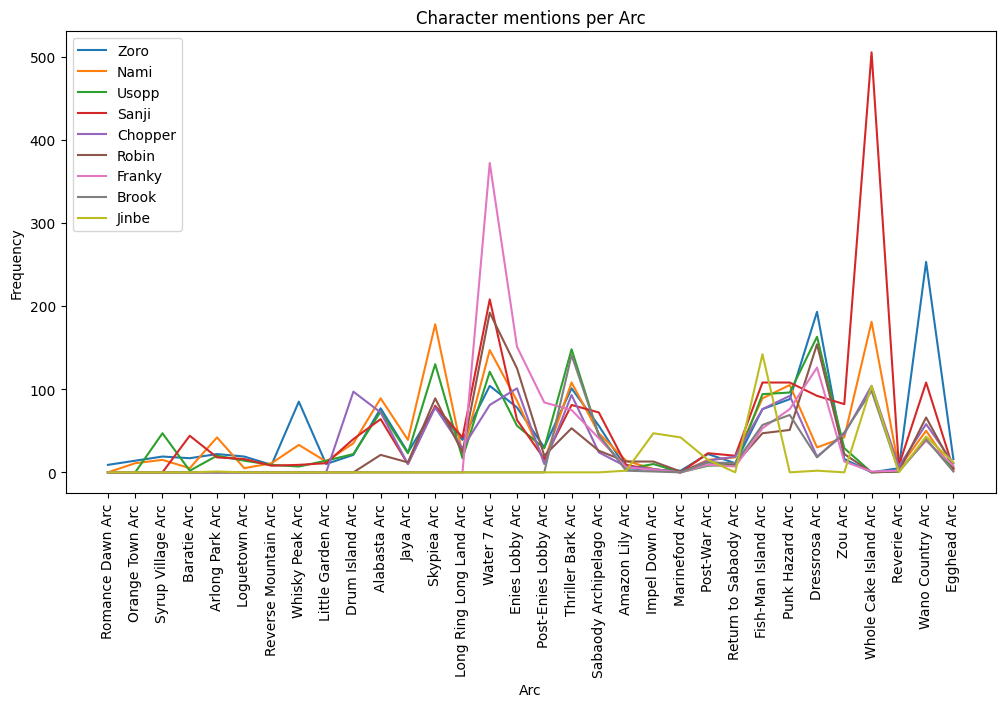

In [4]:
# Initialize a dictionary to store word frequencies per arc
arc_word_frequencies = {word: [] for word in words_to_check}
arc_word_frequencies['Arc'] = []

# Group the dataframe by 'Arc' and sort by the order of arcs in the series
arc_order = ['Romance Dawn Arc', 'Orange Town Arc', 'Syrup Village Arc', 'Baratie Arc', 'Arlong Park Arc', 
             'Loguetown Arc', 'Reverse Mountain Arc', 'Whisky Peak Arc', 'Little Garden Arc', 'Drum Island Arc', 
             'Alabasta Arc', 'Jaya Arc', 'Skypiea Arc', 'Long Ring Long Land Arc', 'Water 7 Arc', 'Enies Lobby Arc', 
             'Post-Enies Lobby Arc', 'Thriller Bark Arc', 'Sabaody Archipelago Arc', 'Amazon Lily Arc', 
             'Impel Down Arc', 'Marineford Arc', 'Post-War Arc', 'Return to Sabaody Arc', 'Fish-Man Island Arc', 
             'Punk Hazard Arc', 'Dressrosa Arc', 'Zou Arc', 'Whole Cake Island Arc', 'Reverie Arc', 'Wano Country Arc', 'Egghead Arc']

df['Arc'] = pd.Categorical(df['Arc'], categories=arc_order, ordered=True)
grouped_df = df.groupby('Arc')

# Calculate word frequencies for each arc
for arc, group in grouped_df:
    arc_summary = ' '.join(group['Summary'].dropna()).lower()
    arc_word_frequencies['Arc'].append(arc)
    for word in words_to_check:
        arc_word_frequencies[word].append(arc_summary.split().count(word.lower()))

# Create a DataFrame for word frequencies per arc
arc_freq_df = pd.DataFrame(arc_word_frequencies)

# Plot the word frequencies per arc
plt.figure(figsize=(12, 6))
for word in words_to_check:
    sns.lineplot(data=arc_freq_df, x='Arc', y=word, label=word)

plt.xlabel('Arc')
plt.ylabel('Frequency')
plt.title('Character mentions per Arc')
plt.legend()
plt.xticks(rotation=90)
plt.show()

C:\Users\tiago\AppData\Local\Temp\ipykernel_7660\3475246485.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  arc_episode_counts = df.groupby('Arc')['Episode'].count()


Zoro in Romance Dawn Arc: 3
Nami in Romance Dawn Arc: 3
Usopp in Romance Dawn Arc: 3
Sanji in Romance Dawn Arc: 3
Chopper in Romance Dawn Arc: 3
Robin in Romance Dawn Arc: 3
Franky in Romance Dawn Arc: 3
Brook in Romance Dawn Arc: 3
Jinbe in Romance Dawn Arc: 3
Zoro in Orange Town Arc: 5
Nami in Orange Town Arc: 5
Usopp in Orange Town Arc: 5
Sanji in Orange Town Arc: 5
Chopper in Orange Town Arc: 5
Robin in Orange Town Arc: 5
Franky in Orange Town Arc: 5
Brook in Orange Town Arc: 5
Jinbe in Orange Town Arc: 5
Zoro in Syrup Village Arc: 10
Nami in Syrup Village Arc: 10
Usopp in Syrup Village Arc: 10
Sanji in Syrup Village Arc: 10
Chopper in Syrup Village Arc: 10
Robin in Syrup Village Arc: 10
Franky in Syrup Village Arc: 10
Brook in Syrup Village Arc: 10
Jinbe in Syrup Village Arc: 10
Zoro in Baratie Arc: 12
Nami in Baratie Arc: 12
Usopp in Baratie Arc: 12
Sanji in Baratie Arc: 12
Chopper in Baratie Arc: 12
Robin in Baratie Arc: 12
Franky in Baratie Arc: 12
Brook in Baratie Arc: 12
Jinb

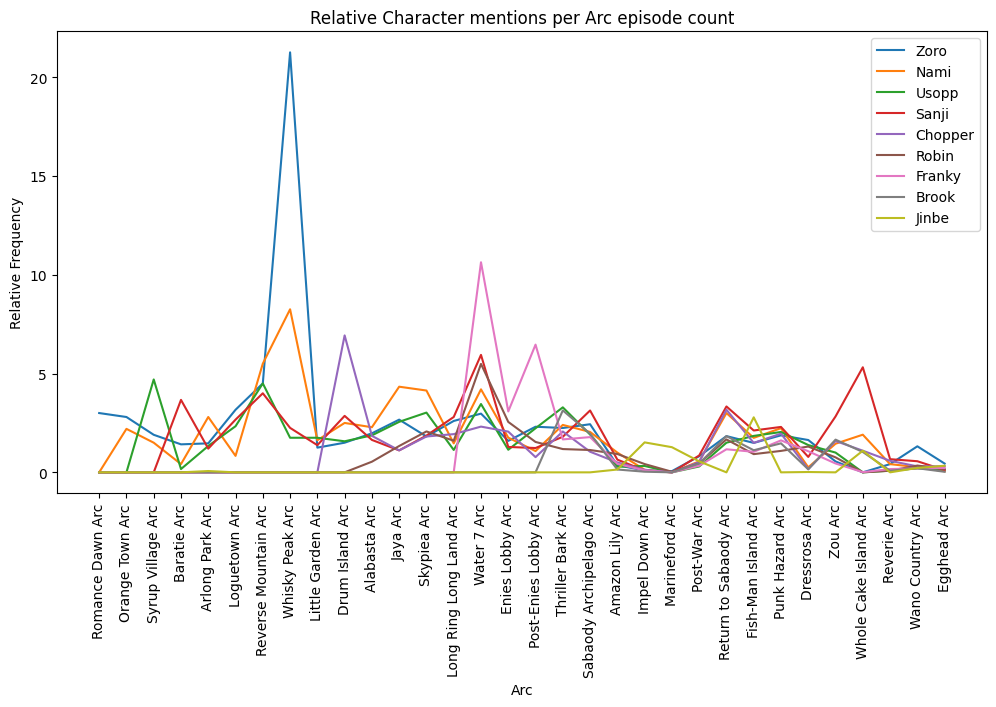

In [5]:
# Calculate the number of episodes in each arc
arc_episode_counts = df.groupby('Arc')['Episode'].count()

# Initialize a dictionary to store relative word frequencies per arc
relative_arc_word_frequencies = {word: [] for word in words_to_check}
relative_arc_word_frequencies['Arc'] = []

# Calculate relative word frequencies for each arc
for arc in arc_order:
    if arc in arc_episode_counts:
        num_episodes = arc_episode_counts[arc]
        relative_arc_word_frequencies['Arc'].append(arc)
        for word in words_to_check:
            total_word_count = arc_freq_df.loc[arc_freq_df['Arc'] == arc, word].values[0]
            relative_frequency = total_word_count / num_episodes
            print(f'{word} in {arc}: {num_episodes}')
            relative_arc_word_frequencies[word].append(relative_frequency)

# Create a DataFrame for relative word frequencies per arc
relative_arc_freq_df = pd.DataFrame(relative_arc_word_frequencies)

# Plot the relative word frequencies per arc
plt.figure(figsize=(12, 6))
for word in words_to_check:
    sns.lineplot(data=relative_arc_freq_df, x='Arc', y=word, label=word)

plt.xlabel('Arc')
plt.ylabel('Relative Frequency')
plt.title('Relative Character mentions per Arc episode count')
plt.legend()
plt.xticks(rotation=90)
plt.show()

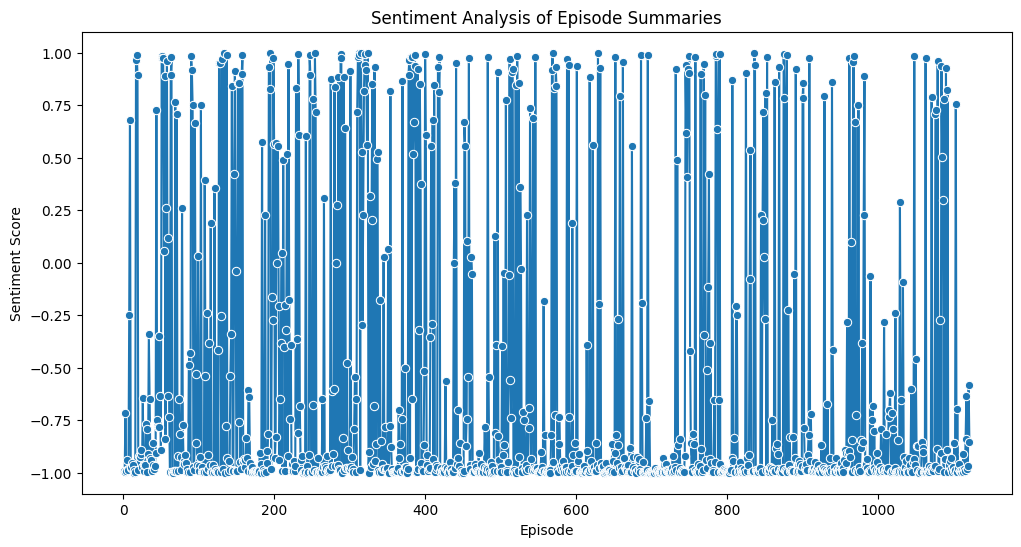

In [6]:
# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment(text):
    if pd.isnull(text):
        return 0  # Neutral sentiment for missing summaries
    sentiment = sia.polarity_scores(text)
    return sentiment['compound']

# Apply the function to the 'Summary' column to get sentiment scores
df['Sentiment'] = df['Summary'].apply(get_sentiment)

# Plot the sentiment scores over episodes
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Episode', y='Sentiment', marker='o')

plt.xlabel('Episode')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Analysis of Episode Summaries')
plt.show()



                        Arc  Sentiment
0          Romance Dawn Arc  -0.901533
1           Orange Town Arc  -0.829320
2         Syrup Village Arc  -0.421220
3               Baratie Arc  -0.753783
4           Arlong Park Arc  -0.749713
5             Loguetown Arc   0.103533
6      Reverse Mountain Arc  -0.051750
7           Whisky Peak Arc  -0.501200
8         Little Garden Arc  -0.697037
9           Drum Island Arc  -0.519629
10             Alabasta Arc  -0.531328
11                 Jaya Arc  -0.107956
12              Skypiea Arc  -0.616970
13  Long Ring Long Land Arc  -0.383767
14              Water 7 Arc  -0.477786
15          Enies Lobby Arc  -0.431033
16     Post-Enies Lobby Arc   0.437200
17        Thriller Bark Arc  -0.637511
18  Sabaody Archipelago Arc  -0.279613
19          Amazon Lily Arc  -0.164586
20           Impel Down Arc  -0.684084
21           Marineford Arc  -0.771509
22             Post-War Arc  -0.437859
23    Return to Sabaody Arc  -0.357917
24      Fish-Man Island A

C:\Users\tiago\AppData\Local\Temp\ipykernel_7660\971387641.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  arc_sentiment_avg = df.groupby('Arc')['Sentiment'].mean().reset_index()
C:\Users\tiago\AppData\Local\Temp\ipykernel_7660\971387641.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=arc_sentiment_avg, x='Arc', y='Sentiment', order=arc_order, ci=None)


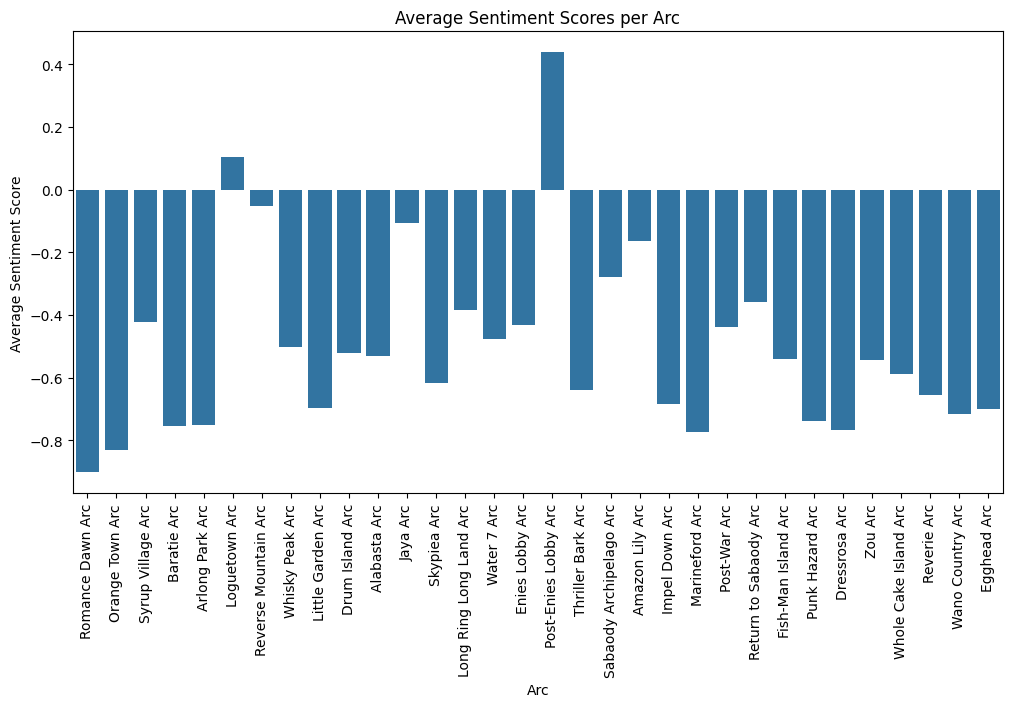

In [7]:
# Group the DataFrame by 'Arc' and calculate the mean sentiment score for each group
arc_sentiment_avg = df.groupby('Arc')['Sentiment'].mean().reset_index()

# Display the results
print(arc_sentiment_avg)
# Plot the average sentiment scores per arc
plt.figure(figsize=(12, 6))
sns.barplot(data=arc_sentiment_avg, x='Arc', y='Sentiment', order=arc_order, ci=None)

# Ensure x-axis only displays the arcs in arc_order
plt.xticks(ticks=range(len(arc_order)), labels=arc_order, rotation=90)
plt.xticks(rotation=90)
plt.xlabel('Arc')
plt.ylabel('Average Sentiment Score')
plt.title('Average Sentiment Scores per Arc')
plt.show()


In [8]:
def preprocess_text(text):
    # Remove punctuation and numbers
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove stop words so the wordcloud won't be full of "the" and "or"
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

df['Cleaned_Summary'] = df['Summary'].apply(preprocess_text)

In [9]:
# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

# Fit and transform the cleaned summaries
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Cleaned_Summary'])

# Get feature names (keywords)
feature_names = tfidf_vectorizer.get_feature_names_out()

In [10]:
def extract_keywords(tfidf_matrix, feature_names, top_n=10):
    keywords = []
    for row in tfidf_matrix:
        # Get the indices of the top_n keywords
        top_indices = row.toarray().flatten().argsort()[-top_n:]
        # Get the corresponding keywords
        top_keywords = [feature_names[i] for i in top_indices]
        keywords.append(top_keywords)
    return keywords

# Extract top 10 keywords for each episode
df['Keywords'] = extract_keywords(tfidf_matrix, feature_names, top_n=10)

# Display the DataFrame with keywords
print(df[['Summary', 'Keywords']])

                                                Summary  \
0     Luffy is cast at sea in a barrel. Sailors on a...   
1     Luffy and Koby arrive at Shells Town, a town w...   
2     Luffy returns the katana to Zoro, who uses the...   
3     The burglar girl's dinghy is discovered by thr...   
4     The girl introduces herself as Nami, a thief t...   
...                                                 ...   
1115  While meeting with Dragon and Ivankov, Sabo ce...   
1116  Sabo battled through Pangaea Castle and obtain...   
1117  Cobra is shocked and infuriated that Imu had s...   
1118  Igaram, Pell, and Chaka became concerned that ...   
1119  As the battle at Hachinosu continues, just as ...   

                                               Keywords  
0     [battle, destroyed, gomu, explains, sea, luffy...  
1     [stopped, girl, rooftop, bar, koby, town, mari...  
2     [marines, zoro, zoros, buggy, base, helmeppo, ...  
3     [fruit, hair, bird, hat, boat, sea, pirates, l...  
4

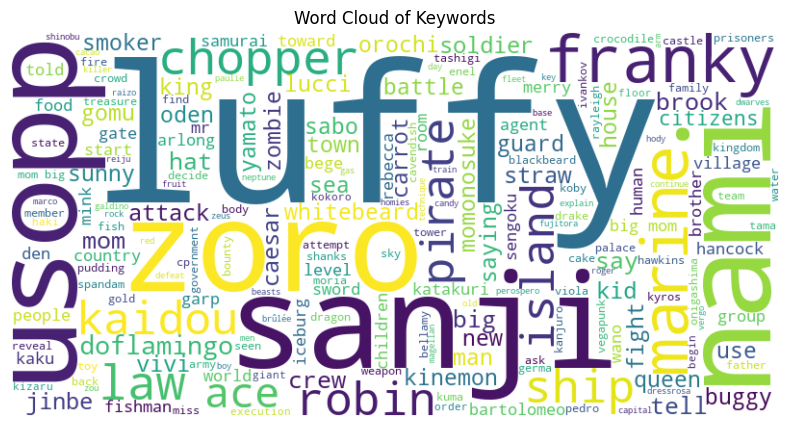

In [11]:
# Combine all keywords into a single text string
all_keywords = ' '.join([' '.join(keywords) for keywords in df['Keywords']])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_keywords)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Keywords')
plt.show()